<a href="https://colab.research.google.com/github/Ayush0809/Prediction-of-Cervical-Cancer-using-Chicken-Swarm-Optimization/blob/master/CSO_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Authenticating and installing important Dependancies

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 110845 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [0]:
# Installing PyTorch

# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import random
import pandas as pd
import io
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [0]:
from google.colab import files
uploaded = files.upload()
ds = pd.read_csv(io.StringIO(uploaded['risk_factors_cervical_cancer.csv'].decode('utf-8')))
ds

Saving risk_factors_cervical_cancer.csv to risk_factors_cervical_cancer.csv


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,...,?,?,0,0,0,0,0,0,0,0


In [0]:
Dn = 32
#DS = 

In [0]:
r = np.random.random((Dn,))
c = 0.00000000001

def f(x):
  
  print("------------------------------XXXXXXXXXXX---------------------------")
  print(x)
  print("------------------------------XXXXXXXXXXX---------------------------")
  
  s_i = 0

  for i in range(len(x[0])):
    if x[0][i]==1:
      s_i+=1
  if(s_i == 0):
    print("Error 0 features")
      
  # Defining X

  df = np.zeros((858,s_i))

  s_f = 0

  for i in range(len(x[0])):
    if x[0][i]==1:

      select_row = ds.iloc[:,i]
      select_arr = np.array(select_row)

      for ix in range(len(df)):

        if(select_row[ix]=='?'):
          df[ix][s_f] = -1
        else:
          df[ix][s_f] = select_arr[ix]
      s_f+=1
      
  #Defining y

  df_y = np.zeros((858,4))

  for i in range(4):
    select_row = ds.iloc[:,32+i]
    select_arr = np.array(select_row)

    for ix in range(len(df_y)):
      df_y[ix][i] = select_arr[ix]
      
  #Random Forest Prediction

  rf = RandomForestClassifier(n_estimators=1000, oob_score=True, random_state=123456)
  rf.fit(df, df_y)

  train_accuracy_rf = rf.score(df,df_y)

  return train_accuracy_rf

print(r)

[0.81112568 0.58727089 0.88126484 0.34415936 0.65647079 0.26420726
 0.80351952 0.54147219 0.32433626 0.90331527 0.82981122 0.54085099
 0.32586026 0.98054797 0.462487   0.71475965 0.45759689 0.82067762
 0.65528656 0.86668299 0.29643526 0.84296625 0.56734756 0.1448378
 0.46829165 0.54189868 0.48850045 0.78544917 0.77785287 0.48928462
 0.76480029 0.30061398]


In [0]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [0]:
'''
l = [1,2,3,4,5]

for ix in range(5):
  l[ix] = l[ix]*5
  
print(l)


l = np.random.randint(0,2,(1,Dn))
print(l)
print(l[0][1])
'''

'\nl = [1,2,3,4,5]\n\nfor ix in range(5):\n  l[ix] = l[ix]*5\n  \nprint(l)\n\n\nl = np.random.randint(0,2,(1,Dn))\nprint(l)\nprint(l[0][1])\n'

In [0]:
class Chicken:

  def __init__(self):
    self.x_sample = np.random.randint(0,2,(1,Dn))
   
    while np.all(self.x_sample == 0):
      self.x_sample = np.random.randint(0,2,(1,Dn))
      
    self.x_real = self.x_sample
    self.next_position = np.random.random((Dn,))
    self.position = self.next_position
    self.fitness = -1
    self.group = -1
    self.hierarchy = "none"
  
  def evaluate(self):
    self.position = self.next_position
    self.x_real = self.x_sample
    self.fitness = f(self.x_real)
    
  
  def update_rooster(self,g,rooster):
    k = np.random.randint(0,g)
    
    while rooster[k].group == self.group:
      k = np.random.randint(0,g)
    
    #Calculating 'sigma_2'
    if rooster[k].group != self.group:
      if rooster[k].fitness >= self.fitness:
        sigma_2 = 1
        
      else:
        sigma_2 = np.exp((rooster[k].fitness - self.fitness) / (np.abs(self.fitness) + c))      # 'c' is the smallest constant to avoid dbz
        
    # Calculating 'next_position'
    Randn = np.random.normal(0,sigma_2)
    
    for ix in range(Dn):
      self.next_position[ix] = self.position[ix] * (1 + Randn)
    
    
    
  def update_hen(self,g,rooster):
    
    for ix in range(0,g):
      if rooster[ix].group == self.group:
        x_r1 = rooster[ix].position
        f_r1 = rooster[ix].fitness
        
    k = np.random.randint(0,g)
    
    while rooster[k].group == self.group:
      k = np.random.randint(0,g)
      
    if rooster[k].group != self.group:
      x_r2 = rooster[k].position
      f_r2 = rooster[k].fitness
      
    f_i = self.fitness
    x_i = self.position
      
    S1 = np.exp( (f_i-f_r1) / (np.abs(f_i) + c))      # 'c' is the smallest constant to avoid dbz
    S2 = np.exp((f_r2 - f_i))
    
    Rand = np.random.rand()
    
    for ix in range(Dn):
      self.next_position[ix] = (x_i[ix] + S1*Rand*(x_r1[ix] - x_i[ix]) + S2*Rand*(x_r2[ix] - x_i[ix]))
    
  def update_chik(self,FL,x_m):
    x_i = self.position
    
    for ix in range(Dn):
      self.next_position[ix] = (x_i[ix] + FL*(x_m[ix] - x_i[ix]))
    
    

In [0]:
y = []

class CSO:
  
  def __init__(self,N,Max_Gen,G,FL=0.5):
    
    #Number of Groups
    g = int(N/5)
    print("g = ",g)
    
    #Initialization of chicken population
    swarm = []
    
    for i in range(N):
      swarm.append(Chicken()) 
      swarm[i].evaluate()
      
    
    t=0
    
    while(t<Max_Gen):
      
      print("Inside While")
      
      if(t%G == 0):
        swarm.sort(key = lambda x:x.fitness , reverse = True)      # Sort swarm according to Fitness values of chickens
        
        print("Sorting Done")
        
        rooster = swarm[:g]
        chiks = swarm[-(2*g):]
        hens = swarm[-(N-g):-(2*g)]
        
        group = np.zeros((N,))       # Array for keeping track of groups to which chicken belong to
        
        # Hierarchy Setup
        for ix in range(g):
          swarm[ix].hierarchy = "rooster"
          swarm[-1-ix].hierarchy = "chik"
          swarm[-2-ix].hierarchy = "chik"
          
        for ix in range(g,(N-2*g)):
          swarm[ix].hierarchy = "hen"
          
        print("Hierarchy Set")  
        
        # Counter for number of chickens in each group  
        count_chiks = np.zeros((g,))
        count_roosters = np.zeros((g,))
        count_hens = np.zeros((g,))
          
        # Group assignment for Roosters
        for ix in range(g):
          r = np.random.randint(0,g)
          
          while count_roosters[r] >= 1:
            print("Inside While  ||  index: {0}  ||  r: {1}  ||  count_roosters[{2}]: {3}".format(ix,r,r,count_roosters[r]))
            r = np.random.randint(0,g)
          
          if count_roosters[r] < 1:
            swarm[ix].group = r+1
            count_roosters[r] = count_roosters[r] + 1
            group[ix] = r+1
        
        print("Group Assignment for Roosters done")
        
        # Group assignment for Hens and Chicks and Mother-Child Relationship
        
        mother_child_r = np.zeros((N,))
        for ix in range(g,(3*g)):
        
          r = np.random.randint(0,g)
          
          while count_hens[r] >= 2:
            r = np.random.randint(0,g)
            
          if count_hens[r] < 2:
            swarm[ix].group = r+1
            count_hens[r] = count_hens[r] + 1
            group[ix] = r+1
            
          r2 = np.random.randint(3*g,5*g)
          
          '''
          if ix+r2 >= N:
            while (ix+r2)>=N:
              print("ix: {0} || r2:{1} || ix+r2: {2} ".format(ix,r2,ix+r2))
              r2 = np.random.randint(2*g,4*g)
          '''
          
          while group[r2] !=0:
            r2 = np.random.randint(3*g,5*g)
            
          if group[r2] == -1:
            swarm[r2].group = r+1
            count_chiks[r] = count_chiks[r] + 1
            group[r2] = r+1
            
          mother_child_r[r2] = ix
          
        print("Group Assignment for Hens and Chicks done")
           
      for ix in range(N):
        print("\n\t For chicken number(ix): ",ix)
        
        if swarm[ix].hierarchy == "rooster":
          print("\t\tChicken is a Rooster")
          swarm[ix].update_rooster(g,rooster)
            
        elif swarm[ix].hierarchy == "hen":
          print("\t\tChicken is a Hen")
          swarm[ix].update_hen(g,rooster)
          
        elif swarm[ix].hierarchy == "chik":
          print("\t\tChicken is a Chick")
          m_ix = int(mother_child_r[ix])             # Index of it's mother
          x_m = swarm[m_ix].position                 # Position of it's mother
          
          swarm[ix].update_chik(FL,x_m)
          
        for jx in range(Dn):
          if sigmoid(swarm[ix].next_position[jx]) > np.random.random():
            swarm[ix].x_sample[0][jx] = 1
              
          else:
            swarm[ix].x_sample[0][jx] = 0 
          
        if f(swarm[ix].x_sample) > swarm[ix].fitness:
          swarm[ix].evaluate() 
                    

          
      y.append(swarm[0].fitness)
          
      print("Generation: {0} || Best Fitness: {1} || Best sample:{2} ".format(t,swarm[0].fitness,swarm[0].x_real))
          
      t = t+1      
          
          
          
          

In [0]:
CSO(10,10,2,0.5)

g =  2
------------------------------XXXXXXXXXXX---------------------------
[[1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1]]
------------------------------XXXXXXXXXXX---------------------------
------------------------------XXXXXXXXXXX---------------------------
[[1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1]]
------------------------------XXXXXXXXXXX---------------------------
------------------------------XXXXXXXXXXX---------------------------
[[0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1]]
------------------------------XXXXXXXXXXX---------------------------
------------------------------XXXXXXXXXXX---------------------------
[[0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1]]
------------------------------XXXXXXXXXXX---------------------------
------------------------------XXXXXXXXXXX---------------------------
[[0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0]]
------------------------------XX

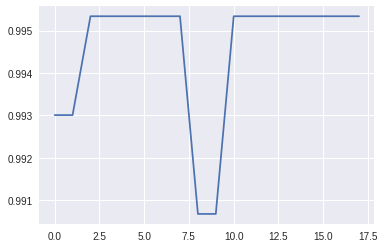

In [0]:
plt.plot(y)

In [0]:
l1 = [1,2,3,4,5]
l2 = [2,1,3,4,5]

l1= np.array(l1)
l2= np.array(l2)

np.all(l1 == l2)

False

In [0]:
np.random.rand(Dn)

array([0.32601809, 0.26671767, 0.26352852, 0.79806143, 0.19204366,
       0.81235557, 0.19677578, 0.62531039, 0.24346616, 0.58147719,
       0.3091215 , 0.60424845, 0.34145059, 0.87524585, 0.11498215,
       0.55575697, 0.33574974, 0.71033764, 0.73553541, 0.66321639,
       0.90829832, 0.54791721, 0.6470162 , 0.28006307, 0.71225193,
       0.26269207, 0.99625639, 0.55171547, 0.50846175, 0.89206581,
       0.77058061, 0.69830024, 0.61193146, 0.31303621, 0.05975483,
       0.1955658 ])

In [0]:

'''
        # Group assignment for chicks
        for ix in range(2*g)
        
          r = np.random.randint(1,g)  
          
          while count_chiks[r] >= 2:
            r = np.random.randint(1,g)
            
          if count_chiks[r] < 2:
            swarm[N-ix-1].group = r
            count_chiks[r] = count_chiks[r] + 1
''' 

# **Testing Not To Be Part Of The  Code**

In [0]:
import pandas as pd
import cv2
import skimage.io as io

In [0]:
# select = [[1 ,1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1]]

select = [[0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0]]

print(select)

[[0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0]]


In [0]:
s_i = 0

for i in range(len(select[0])):
  if select[0][i]==1:
    s_i+=1
    
print(s_i)

18


In [0]:
from google.colab import files
uploaded = files.upload()


# ds = pd.read_csv('home/priyam/Downloads/risk_factors_cervical_cancer.csv')

Saving risk_factors_cervical_cancer.csv to risk_factors_cervical_cancer.csv


In [0]:
import pandas as pd
import io

ds = pd.read_csv(io.StringIO(uploaded['risk_factors_cervical_cancer.csv'].decode('utf-8')))
ds

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,...,?,?,0,0,0,0,0,0,0,0


In [0]:
s_i = 0

for i in range(len(select[0])):
  if select[0][i]==1:
    s_i+=1
    
# print(s_i)

df = np.zeros((858,s_i))

# print(len(df))

# select_row = ds.iloc[:,0]

# selected_row_arr = np.array(select_row)

# print(selected_row_arr[0])
s_f=0

for i in range(len(select[0])):
  if select[0][i]==1:
    
    select_row = ds.iloc[:,i]
    select_arr = np.array(select_row)
    
    for ix in range(len(df)):
      
      if(select_row[ix]=='?'):
        df[ix][s_f] = -1
      else:
        df[ix][s_f] = select_arr[ix]
    s_f+=1
      
# print(np.unique(df))
# print(select_row.unique())

print(df)
      

[[ 4.   15.    0.   ...  0.    0.    0.  ]
 [ 1.   14.    0.   ...  0.    0.    0.  ]
 [ 1.   -1.    0.   ...  0.    0.    0.  ]
 ...
 [ 2.   17.    0.08 ...  0.    0.    0.  ]
 [ 2.   24.    0.08 ...  0.    0.    0.  ]
 [ 2.   20.    0.5  ...  0.    0.    0.  ]]


In [0]:
df_y = np.zeros((858,4))

for i in range(4):
  select_row = ds.iloc[:,32+i]
  select_arr = np.array(select_row)
  
  for ix in range(len(df_y)):
    df_y[ix][i] = select_arr[ix]
    
print(df_y)
  

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [0]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df,df_y,test_size=0.4,random_state=42)

from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(df, df_y)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    
    
    test_accuracy[i] = knn.score(X_test, y_test) 



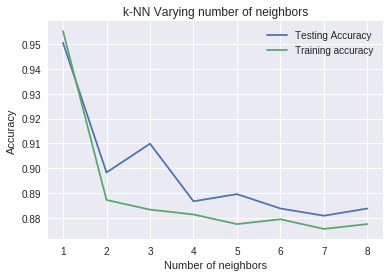

In [0]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [0]:
print(train_accuracy)

[0.95525292 0.88715953 0.88326848 0.88132296 0.87743191 0.87937743
 0.87548638 0.87743191]


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rf = RandomForestClassifier(n_estimators=1000, oob_score=True, random_state=123456)
rf.fit(df, df_y)

train_accuracy_rf = rf.score(df,df_y)

print(train_accuracy_rf)


0.9708624708624709


In [0]:
len(df)

858

In [0]:
l = [[1,2,3],[4,5,6],[7,8,9]]
l = np.array(l)
print(np.unique(l))


[1 2 3 4 5 6 7 8 9]


In [0]:
l = pd.DataFrame(l)

In [0]:
s = l.iloc[:,2]

In [0]:
type(s)

pandas.core.series.Series

In [0]:
s.shape


(3,)

In [0]:
s[2]

9

In [0]:
if s.all()==1:
  print("HI")

HI


In [0]:
arr = np.array(s)

type(arr)

numpy.ndarray